In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def raman_plot():
    """
    Funzione che serve per settare la dimensione dell'immgine e i label degli assi per un plot di spettro Raman.
    """
    plt.figure(figsize=(16,6))
    plt.xlabel("wave number [1/cm]")
    plt.ylabel("Intensity")

## Traspoizione dei dati
Prima di iniziare dobbiamo trasporre le tabelle dei dati in modo che siano passabili agli algoritmi di Clustering. Le "features" dovranno essere le lunghezze d'onda dei dati.

In [6]:
#definisco i nomi da assegnare ai punti delli spettri di sampling
#wn -> wave number  r -> row c -> columns
names = ['wn']+[f'r{k}c{i}' for k in range(1,12) for i in range(1,12)]

In [11]:
# import dei "normalized data without offset"
data = pd.read_csv("../data/processed/data_normalized_without_offset.csv")
# import dei dati senza rumore  ("nn" --> no noise)
data_nn = pd.read_csv("../data/processed/EDA_processed_data.csv")

**Per poter usare il nostro algoritmo dobbiamo traspore il database, usando le lunghezze d'onda come features.**

In [6]:
data_nnt = data_nn.transpose()
new_header = data_nnt.iloc[0] #grab the first row for the header
data_nnt = data_nnt[1:]
data_nnt.columns = new_header #set the header row as the df header
data_nnt.head()

wn,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,...,1240.0,1241.0,1242.0,1243.0,1244.0,1245.0,1246.0,1247.0,1248.0,1249.0
r1c1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
r1c2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
r1c3,0.0,0.0,0.0,0.0,0.0,0.000405,0.000539,0.000715,0.00077,0.000908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
r1c4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
r1c5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data_t = data.transpose()
new_header = data_t.iloc[0] #grab the first row for the header
data_t = data_t[1:]
data_t.columns = new_header #set the header row as the df header
data_t.head()

wn,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,...,1240.0,1241.0,1242.0,1243.0,1244.0,1245.0,1246.0,1247.0,1248.0,1249.0
r1c1,0.000122,0.000233,0.000247,0.000202,0.000015,-0.000092,-0.000235,-0.000359,-0.000355,-0.000359,...,-0.000121,0.000042,0.000070,0.000083,0.000047,-0.000019,-0.000164,-0.000233,-0.000186,0.000020
r1c2,-0.000049,-0.000053,-0.000060,-0.000074,-0.000101,-0.000116,-0.000137,-0.000162,-0.000174,-0.000179,...,-0.000252,-0.000203,-0.000206,-0.000214,-0.000226,-0.000232,-0.000233,-0.000232,-0.000234,-0.000220
r1c3,0.000013,0.000068,0.000095,0.000169,0.000338,0.000405,0.000539,0.000715,0.000770,0.000908,...,0.000143,0.000198,0.000157,0.000051,-0.000050,-0.000034,0.000043,0.000119,0.000150,0.000208
r1c4,-0.000187,0.000087,0.000141,0.000141,-0.000003,-0.000106,-0.000230,-0.000318,-0.000293,-0.000203,...,-0.000229,-0.000235,-0.000208,-0.000156,-0.000116,-0.000137,-0.000199,-0.000231,-0.000208,-0.000131
r1c5,-0.000671,-0.000473,-0.000425,-0.000353,-0.000251,-0.000247,-0.000232,-0.000217,-0.000233,-0.000222,...,-0.000008,-0.000107,-0.000135,-0.000169,-0.000170,-0.000122,-0.000004,0.000067,0.000050,-0.000035


## Prova di clustering con DBSCAN

### Clustering dei dati rumorosi

In [8]:
cluster_DB = DBSCAN(eps=0.025, min_samples=2)
cluster_DB.fit(data_t)
label = cluster_DB.labels_

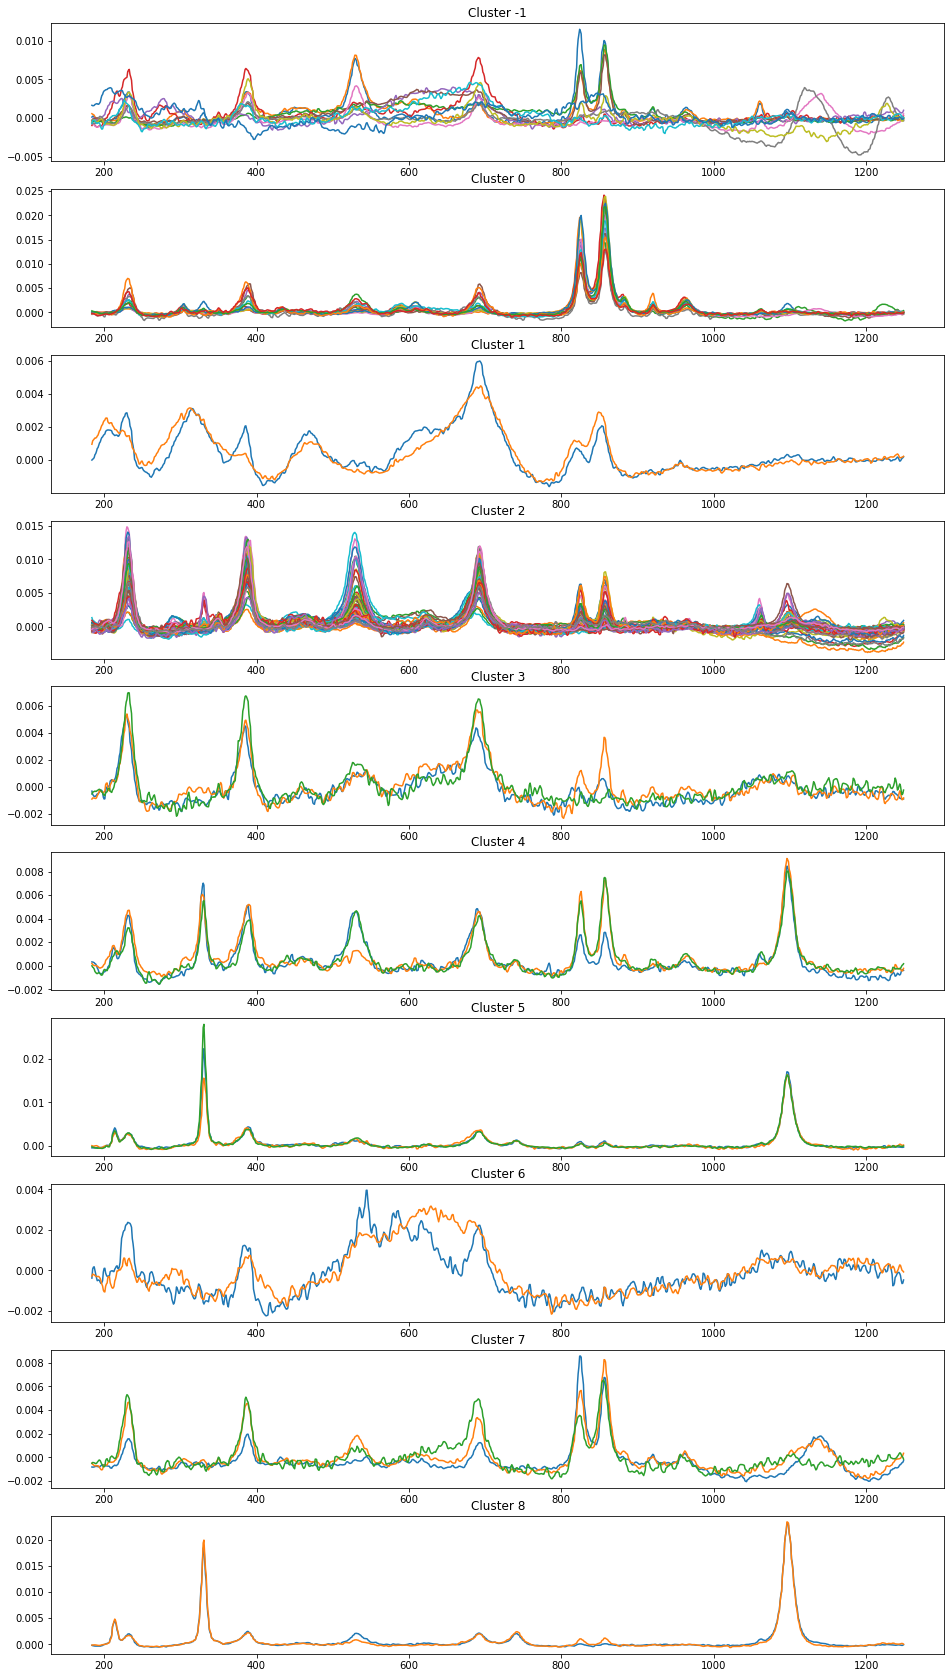

In [9]:
fig, axs = plt.subplots(len(np.unique(label)),figsize = (16,30))
#fig.suptitle("Plot dei vari cluster, asse x: numero d'onda. asse y: intensita'")
for i in enumerate(np.unique(label)):
    for temp in enumerate(label):
        if temp[1]==i[1]:
            axs[i[0]].plot(data.wn,data[names[temp[0]+1]])
            axs[i[0]].set_title('Cluster ' + str(i[1]))

### Clustering dei dati a cui e' stato tolto il rumore

I plot sono comunque fatti con gli spettri rumorosi, altrimenti non si capisce nulla

In [12]:
cluster_nn_DB = DBSCAN(eps=0.02, min_samples=3)
cluster_nn_DB.fit(data_nnt)
label_nn = cluster_nn_DB.labels_

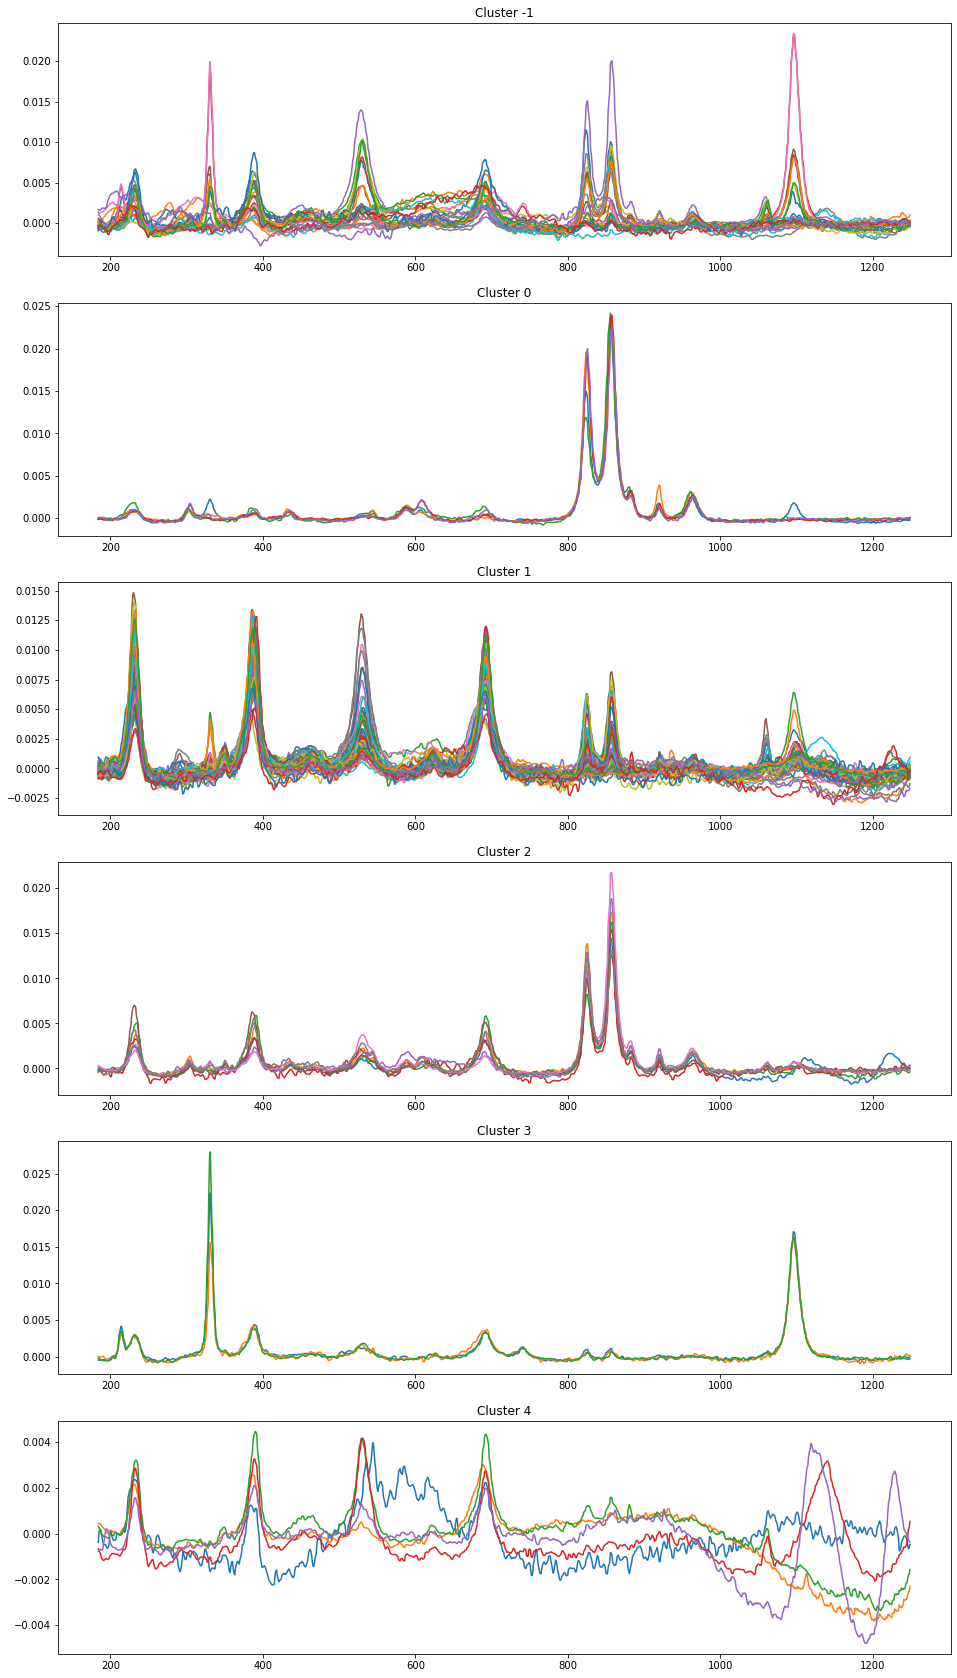

In [13]:
fig2, axs2 = plt.subplots(len(np.unique(label_nn)),figsize = (16,30))
#fig.suptitle("Plot dei vari cluster, asse x: numero d'onda. asse y: intensita'")
for i in enumerate(np.unique(label_nn)):
    for temp in enumerate(label_nn):
        if temp[1]==i[1]:
            axs2[i[0]].plot(data.wn,data[names[temp[0]+1]])
            axs2[i[0]].set_title('Cluster ' + str(i[1]))

## Prova di clustering con OPTICS

In [11]:
cluster_nn_OP = OPTICS(min_samples=2, xi=.05, min_cluster_size=.03)
cluster_nn_OP.fit(data_nnt)
label_nn = cluster_nn_OP.labels_

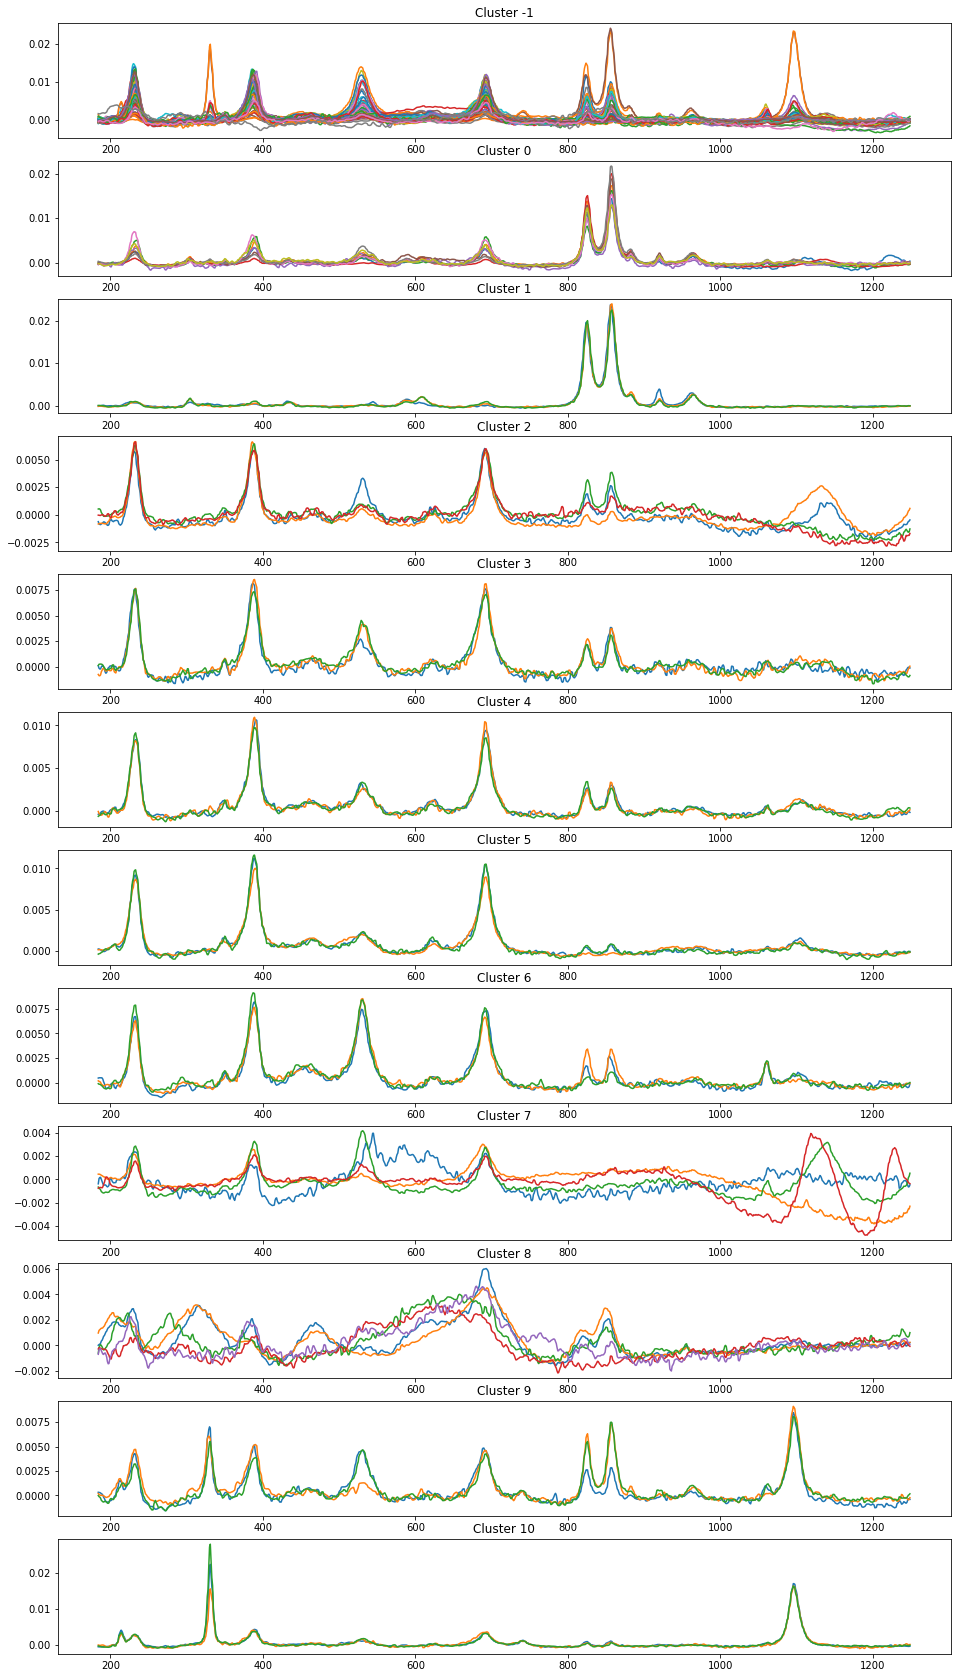

In [12]:
fig2, axs2 = plt.subplots(len(np.unique(label_nn)),figsize = (16,30))
#fig.suptitle("Plot dei vari cluster, asse x: numero d'onda. asse y: intensita'")
for i in enumerate(np.unique(label_nn)):
    for temp in enumerate(label_nn):
        if temp[1]==i[1]:
            axs2[i[0]].plot(data.wn,data[names[temp[0]+1]])
            axs2[i[0]].set_title('Cluster ' + str(i[1]))

## Prova di clustering con KMEANS

In [55]:
cluster_t_KM = KMeans(n_clusters=4,max_iter=6000,tol=0.0001)
cluster_t_KM.fit(data_t)
label_t = cluster_t_KM.labels_

### Heat map

Facciamo un plot per vedere se i cluster trovati correlano con la posizione

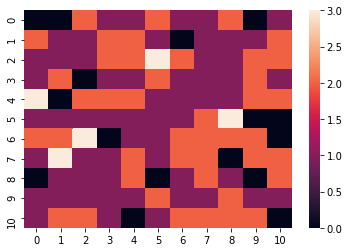

In [56]:
temp = []
for i in enumerate(np.linspace(start=11,stop=121,num=11,dtype=int)):
    temp.append(label_t[i[1]-11:i[1]])
label_grid = np.array(temp)
sns.heatmap(label_grid);

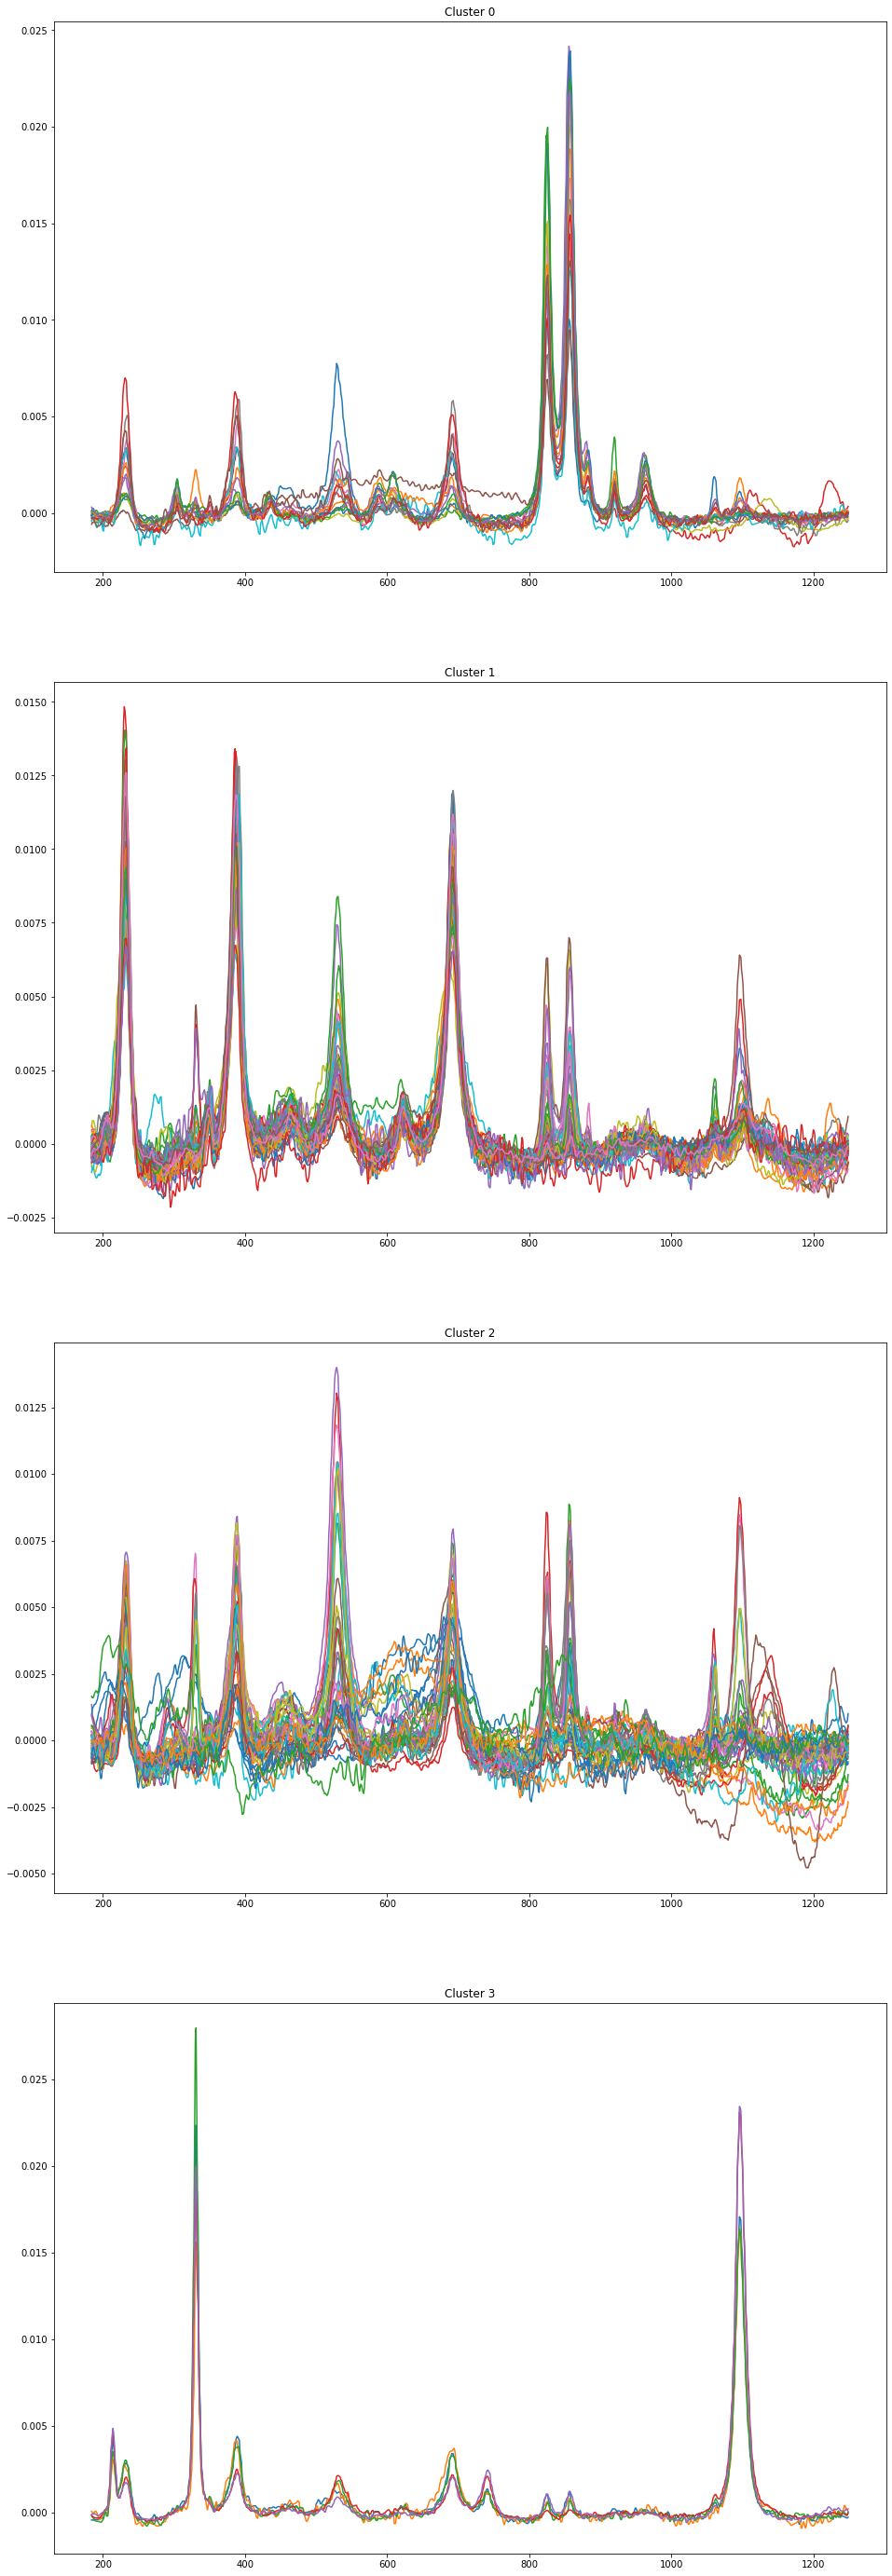

In [57]:
fig2, axs2 = plt.subplots(len(np.unique(label_t)),figsize = (16,50))
#fig.suptitle("Plot dei vari cluster, asse x: numero d'onda. asse y: intensita'")
for i in enumerate(np.unique(label_t)):
    for temp in enumerate(label_t):
        if temp[1]==i[1]:
            axs2[i[0]].plot(data.wn,data[names[temp[0]+1]])
            axs2[i[0]].set_title('Cluster ' + str(i[1]))
            

Plot dei centri del clustering

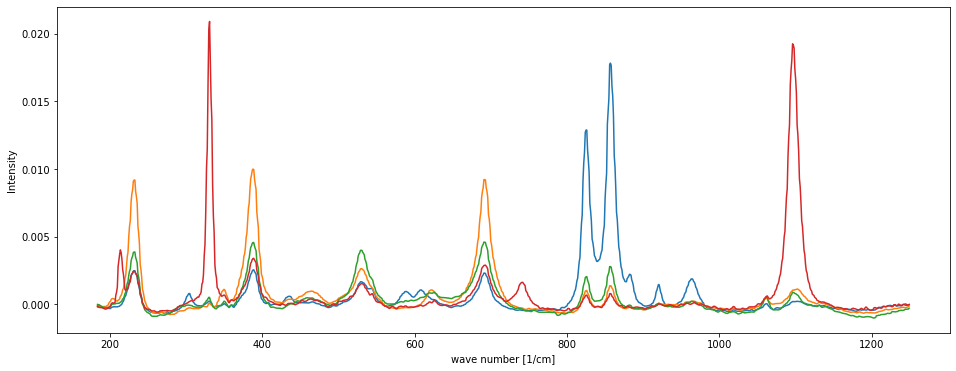

In [58]:
raman_plot()
for temp in np.unique(label_t):
    plt.plot(data.wn,cluster_t_KM.cluster_centers_[temp])